#Import all libraries


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from scipy.stats import boxcox

#load data and view 

In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#number of rows and attributes

In [5]:
dataset.shape

(10000, 14)

#drop unusable attributes for further analysis

In [6]:
dataset = dataset.drop(labels=['RowNumber', 'Surname'], axis=1)

#Exploratory data analysis

#check for missing values

In [7]:
print("Missing values in the train dataset:\n\n",dataset.isna().sum())

Missing values in the train dataset:

 CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


#create a list of categorical features

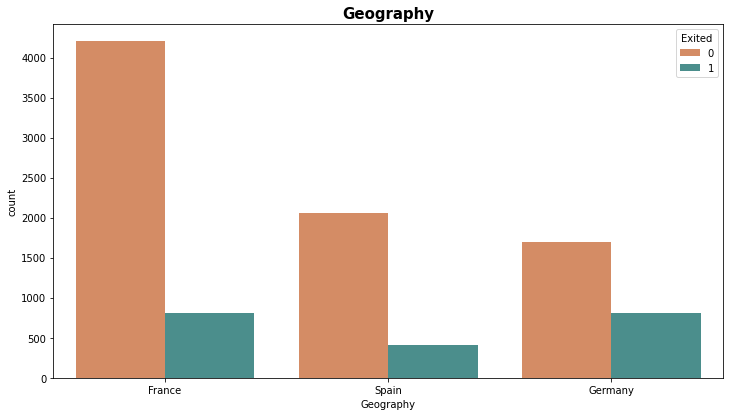

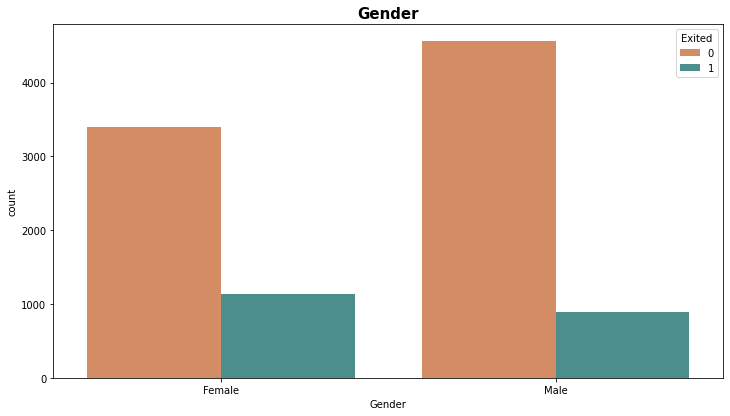

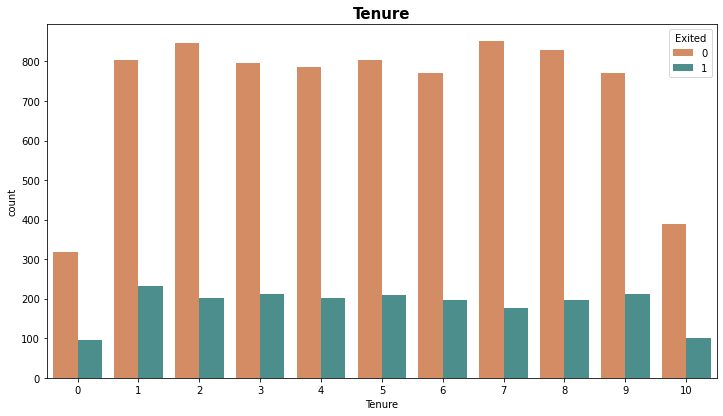

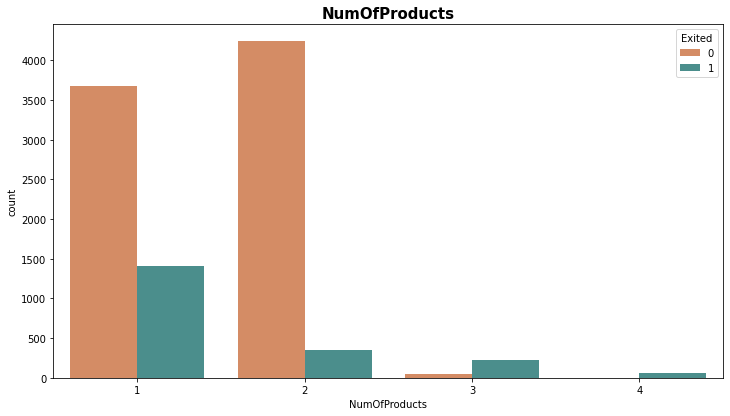

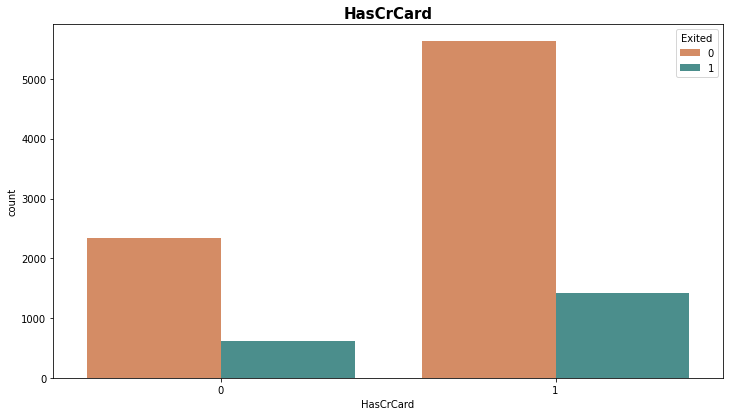

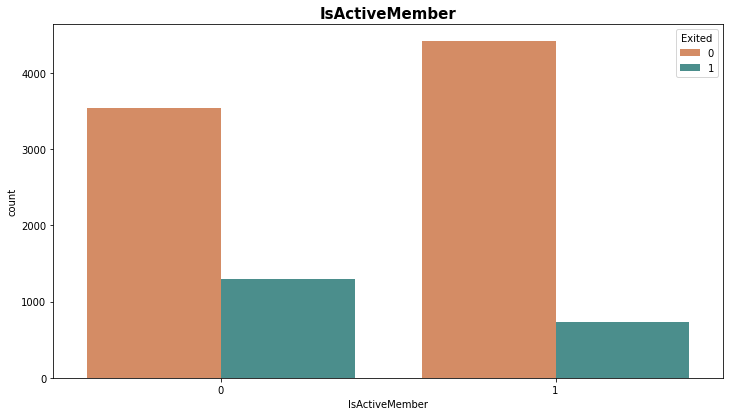

In [8]:
list_of_cat_features = dataset[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(x = list_of_cat_features[feature], hue = 'Exited', data = dataset, palette=palette_features)
     
   

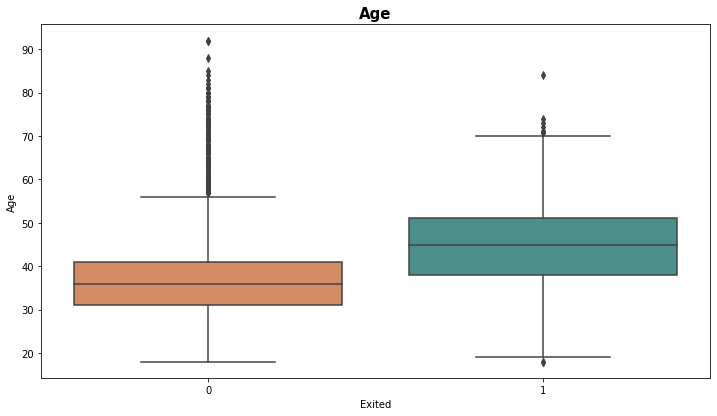

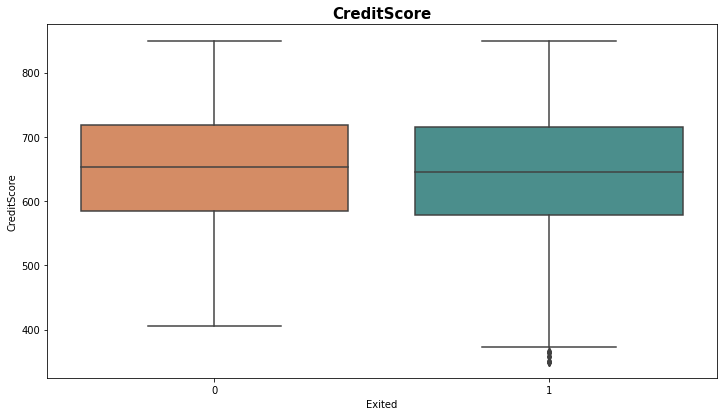

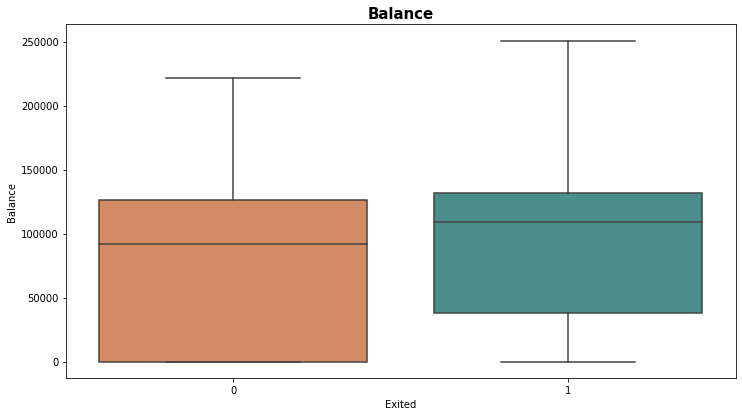

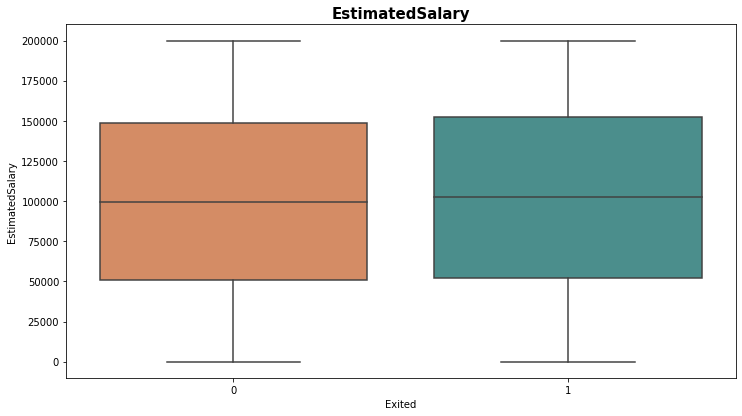

In [9]:
list_of_num_features = dataset[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]  
palette_features = ['#E68753', '#409996']

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.boxplot(x = dataset['Exited'], y = list_of_num_features[feature], data = dataset, palette=palette_features)
   

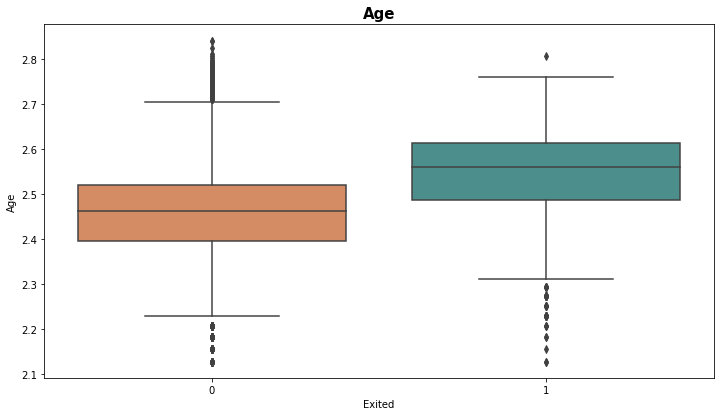

In [10]:
dataset['Age'] = boxcox(dataset['Age'])[0]

plt.figure(figsize=(12,6.5)) 
plt.title('Age', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.boxplot(x=dataset['Exited'], y = dataset['Age'], data = dataset, palette=palette_features)

#Exited = target variable

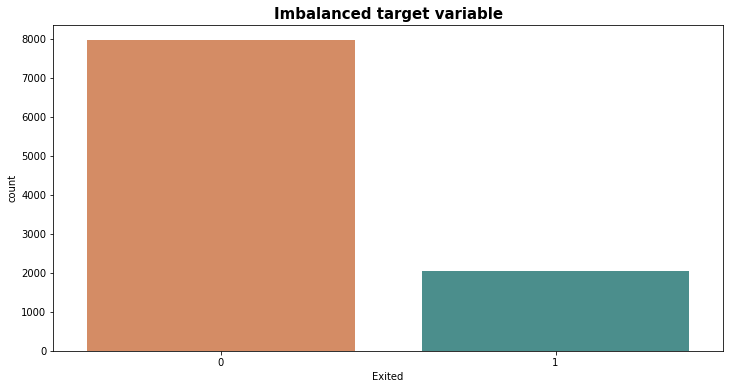

In [11]:
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=dataset['Exited'], data=dataset, palette=palette_features)





# plotting heatmap to notice correlations between fetures

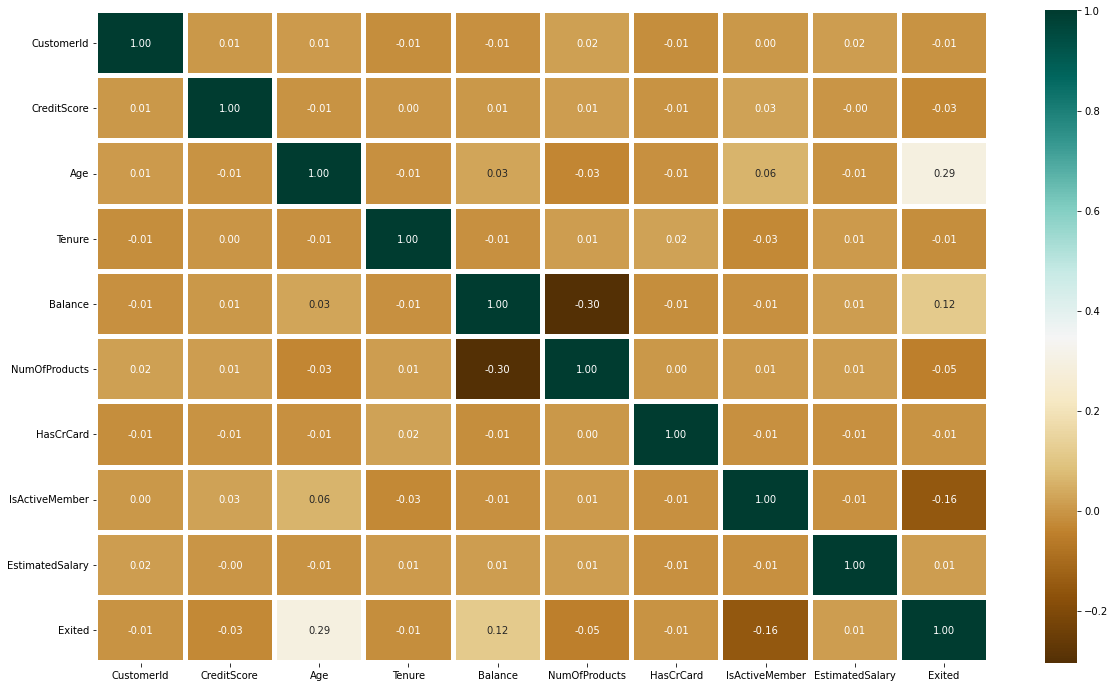

In [12]:
corr = dataset.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

#transform all categorical attributes into numerical

In [13]:
cat_columns = [cname for cname in dataset.columns
                        if dataset[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    dataset[col] = encoder.fit_transform(dataset[col])
    
dataset.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,2.530867,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,2.520415,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,2.530867,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,2.498541,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,2.541019,2,125510.82,1,1,1,79084.10,0


#balancing the target variable

In [14]:
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited']
columns = [c for c in columns if c not in ['Exited']]
y = dataset['Exited'] #prior target variable
X = dataset[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {Counter(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - dataset.shape[0], 'new random picked points')

Imbalanced target class: Counter({0: 7963, 1: 2037})

Balanced target class: Counter({1: 7963, 0: 7963})

5926 new random picked points


#plot the balanced target variable

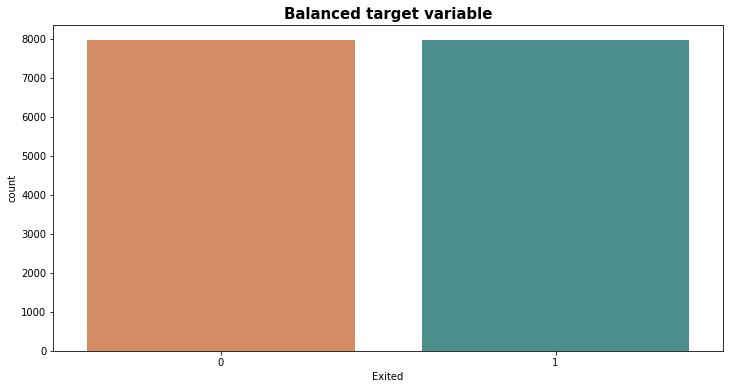

In [15]:
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=y_train_balanced, data=dataset, palette=palette_features)
plt.show()

#preparation of train and test data for ML models


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced, y_train_balanced,test_size=0.3, random_state = 1) #70 % of train data, 30 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11148, 9), (4778, 9), (11148,), (4778,))